# Forecasting on Airplane Data

ACHTUNG: Es fehlt noch der Split zw. Trainings und Validierungsdatensätze

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



## Linear regressions

### Simple linear regression

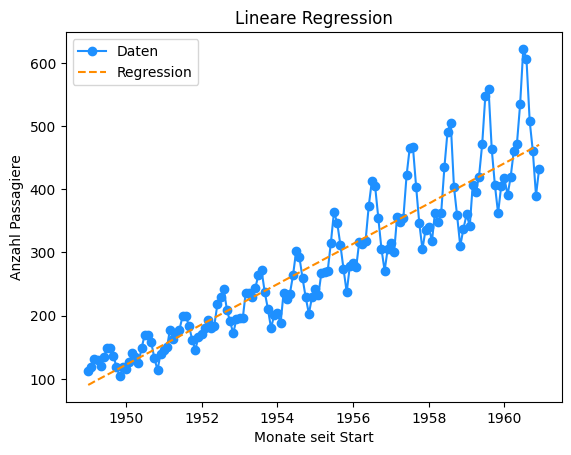

Mean Absolute Percentage Error (MAPE): 12.32%
Mean Absolute Deviation (MAD): 34.41


In [ ]:
# Without splitting the data into training and test sets

df = pd.read_csv('data/raw_data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Monate_seit_start'] = (df['Date'].dt.year - df['Date'].dt.year.min()) * 12 + df['Date'].dt.month - df['Date'].dt.month.min()

X = df[['Monate_seit_start']]
y = df['Passengers']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(df['Date'], y, label='Daten', marker='o', color='dodgerblue')
plt.plot(df['Date'], y_pred, label='Regression', linestyle='--', color='darkorange')
plt.xlabel('Monate seit Start')
plt.ylabel('Anzahl Passagiere')
plt.legend()
plt.title('Lineare Regression')
plt.show()
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y - y_pred))
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")


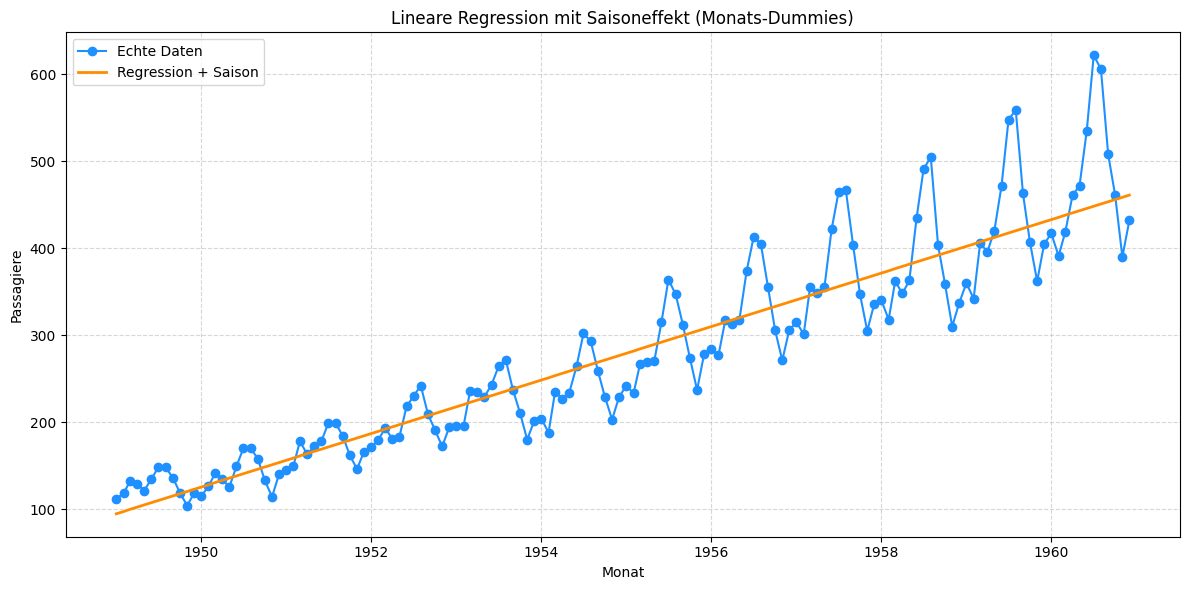

Mean Absolute Percentage Error (MAPE): 11.39%
Mean Absolute Deviation (MAD): 58.66


In [45]:
# With splitting the data into training and test sets

df = pd.read_csv('data/raw_data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Monate_seit_start'] = (df['Date'].dt.year - df['Date'].dt.year.min()) * 12 + df['Date'].dt.month - df['Date'].dt.month.min()

#Datensatz gessamt
X_all = df[['Monate_seit_start']]
y_all = df['Passengers']

#Datensatz Training (Alle Monate bis auf die letzten 12)
X_train = df.iloc[:-12][['Monate_seit_start']]
y_train = df.iloc[:-12]['Passengers']

#Datensatz Validierung (Letzten 12 Monate)
X_valid = df.iloc[-12:][['Monate_seit_start']]
y_valid = df.iloc[-12:]['Passengers']

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_all)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y_all, label='Echte Daten', marker='o', color='dodgerblue')
plt.plot(df['Date'], y_pred, label='Regression + Saison', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('Passagiere')
plt.title('Lineare Regression mit Saisoneffekt (Monats-Dummies)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate Mean Absolute Percentage Error (MAPE) oonn the validation set
mape = np.mean(np.abs((y_valid - y_pred[-12:]) / y_valid)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Deviation (MAD) on the validation set
mad = np.mean(np.abs(y_valid - y_pred[-12:]))
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")

### Linear regression with saison effects

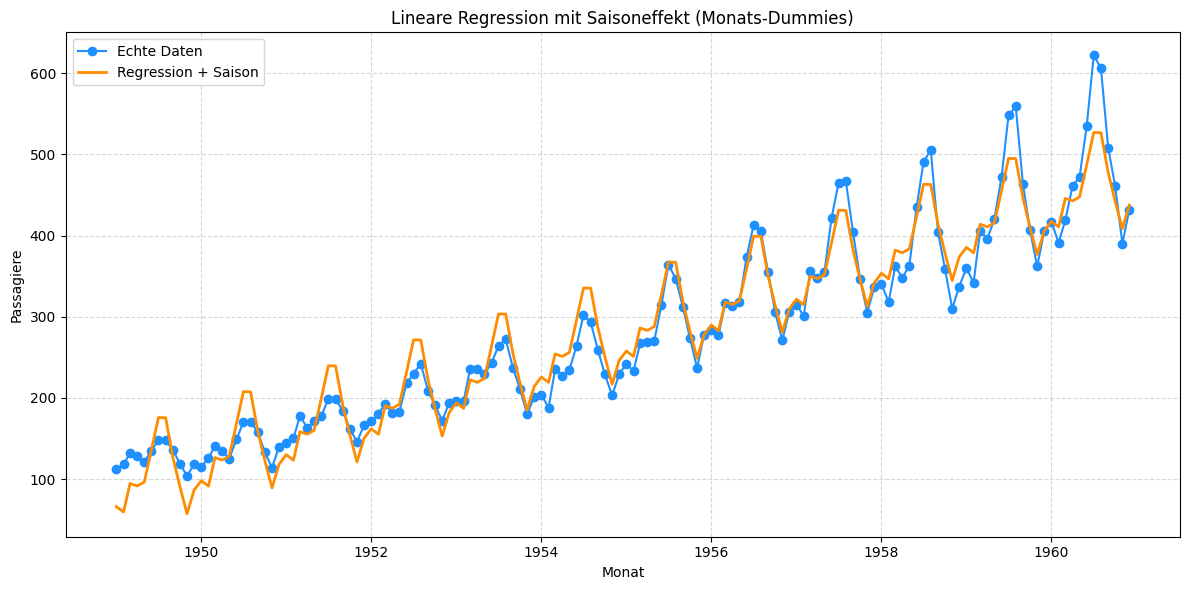

Mean Absolute Percentage Error (MAPE): 8.59%
Mean Absolute Deviation (MAD): 19.77


In [ ]:


# Monatsdummies erzeugen (für Saisoneffekte)
df['Monat_num'] = df['Date'].dt.month
dummies = pd.get_dummies(df['Monat_num'], prefix='Monat', drop_first=True)  # Drop First = Referenzmonat

# Features zusammenstellen
X = pd.concat([df[['Monate_seit_start']], dummies], axis=1)
y = df['Passengers']

# Modell trainieren
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y, label='Echte Daten', marker='o', color='dodgerblue')
plt.plot(df['Date'], y_pred, label='Regression + Saison', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('Passagiere')
plt.title('Lineare Regression mit Saisoneffekt (Monats-Dummies)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y - y_pred))
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")

### Linear regression with saison effects and causal variables

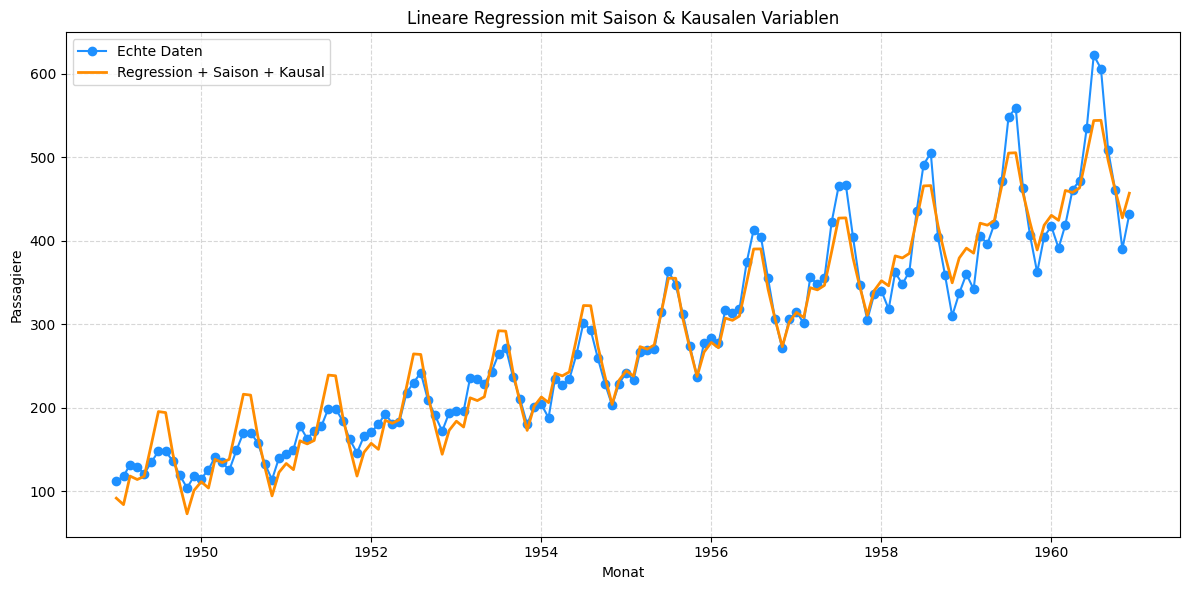

Mean Absolute Percentage Error (MAPE): 7.21%
Mean Absolute Deviation (MAD): 17.48


In [33]:
df = pd.read_csv('data/data.csv', sep=';')

# Convert 'Income' and 'Kerosinpreis' columns to numeric (remove commas and convert to float)
df['Income'] = df['Income'].str.replace(',', '.').astype(float)
df['Kerosinpreis'] = df['Kerosinpreis'].str.replace(',', '.').astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Saisondummies
df['Monat_num'] = df['Date'].dt.month
df[['Income', 'Kerosinpreis']],  # numerische Features
dummies = pd.get_dummies(df['Monat_num'], prefix='Monat', drop_first=True)  # Drop First = Referenzmonat

# Features zusammenstellen inkl. kausaler Variablen
X = pd.concat([
    df[['Income', 'Kerosinpreis']],  # numerische Features
    dummies                          # saisonale Dummies
], axis=1)


y = df['Passengers']

# Modell trainieren
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y, label='Echte Daten', marker='o', color='dodgerblue')
plt.plot(df['Date'], y_pred, label='Regression + Saison + Kausal', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('Passagiere')
plt.title('Lineare Regression mit Saison & Kausalen Variablen')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Evaluation
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y - y_pred))
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")